In [15]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [31]:
a_mod = 2
b_mod = 30

np.random.seed()

Sample data is created by adding gaussian noise to a linear model with y = a_mod * X + b_mod

In [38]:
N = 101
X = np.linspace(0.0, 10.0, N, endpoint = True)

noise = np.random.normal(0, 1, 101)
Y = X*a_mod + b_mod + noise

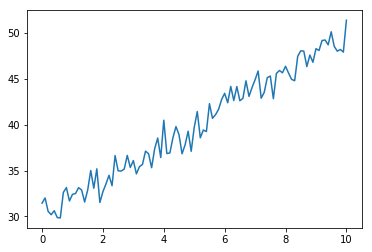

In [41]:
plt.plot(X, Y)
plt.show()

Based on the noisy data, we create the SGD algorithm

In [53]:
def squared_resid(y_prime, y):
    return np.square(y_prime - y)

In [54]:
def get_grad_anal(X, Y, a, b):
    de_da = X * 2 * (a * X + b - Y)
    de_db = 2 * (a * X + b - Y)
    return de_da, de_db

In [78]:
def get_grad_step(X, Y, a, b, step_sz):
    Y_prime = a * X + b
    Y_a = (a + step_sz) * X + b
    Y_b = a * X + (b + step_sz)
    
    err_prev = squared_resid(Y_prime, Y)
    err_a = squared_resid(Y_a, Y)
    err_b = squared_resid(Y_b, Y)
    
    de_da = (err_a - err_prev)/step_sz
    de_db = (err_b - err_prev)/step_sz
    
    return de_da, de_db
    

In [97]:
def get_new_weight(X, Y, a, b, lr):
    de_da, de_db = get_grad_anal(X, Y, a, b)
    new_a = a - lr * de_da
    new_b = b - lr * de_db
    return new_a, new_b

In [80]:
def get_new_weight_step(X, Y, a, b, lr, step_sz):
    de_da, de_db = get_grad_step(X, Y, a, b, step_sz)
    new_a = a - lr * de_da
    new_b = b - lr * de_db
    return new_a, new_b

In [81]:
def SGD_anal (X, Y, lr = 1e-4, a = 1, b = 1, batch_size = 1, epoch = 3):
    for i in range(0,epoch):
        for j in range(0, len(X)):
            new_a, new_b = get_new_weight(X[j], Y[j], a, b, lr)
            a = new_a
            b = new_b
            
    return a, b

In [82]:
def SGD_step (X, Y, lr = 1e-4, a = 1, b = 1, batch_size = 1, epoch = 3, step_sz = 0.01):
    for i in range(0,epoch):
        for j in range(0, len(X)):
            new_a, new_b = get_new_weight_step(X[j], Y[j], a, b, lr, step_sz)
            a = new_a
            b = new_b
            
    return a, b

In [134]:
a_anal, b_anal = SGD_anal(X, Y)

In [135]:
a_step, b_step = SGD_step(X, Y)

In [136]:
print(a_anal, b_anal)

5.26182581971 2.11835828568


In [137]:
print(a_step, b_step)

5.25744696703 2.11887035411


In [169]:
def SGD_batch (X, Y, lr = 1e-4, a = 1, b = 1, batch_size = 1, epoch = 3):
    for i in range(0,epoch):
        batch_num = 0
        for j in range(0, int(len(X)/batch_size)):
            start = batch_num * batch_size
            new_a, new_b = get_weight_batch(X[start: start + batch_size], Y[start:start + batch_size], a, b, lr)
            a = new_a
            b = new_b
            batch_num += 1
            
        if len(X) > batch_num * batch_size:
            new_a, new_b = get_weight_batch(X[batch_num * batch_size: len(X)], Y[batch_num * batch_size: len(Y)], a, b, lr)
    
    return a, b

In [170]:
def get_weight_batch(X, Y, a, b, lr):
    de_da, de_db = get_grad_anal(X, Y, a, b)
    new_a = a - lr * np.mean(de_da)
    new_b = b - lr * np.mean(de_db)
    return new_a, new_b

In [171]:
a_batch, b_batch = SGD_batch(X, Y, batch_size = 1, epoch = 3)

In [172]:
print(a_batch, b_batch)

5.26182581971 2.11835828568
